<a href="https://colab.research.google.com/github/sebastianacevedo1/juanAcevedoEstructuraDatoss/blob/main/grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adjacency Matrix:
[[  0 455   0   0   0   0   0   0   0   0   0   0   0   0   0   0 171]
 [455   0 304   0   0   0   0   0   0   0   0   0   0   0   0   0 356]
 [  0 304   0 280   0 324   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 280   0 193   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 193   0 325   0   0 351 398 251   0 335   0   0 403   0]
 [  0   0 324   0 325   0   0 296   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 100   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 296 100   0 349   0   0   0   0   0   0   0   0]
 [  0   0   0   0 351   0   0 349   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 398   0   0   0   0   0 150   0   0   0   0   0   0]
 [  0   0   0   0 251   0   0   0   0 150   0 278 191   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 278   0   0 256   0   0   0]
 [  0   0   0   0 335   0   0   0   0   0 191   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 256   0   0 1

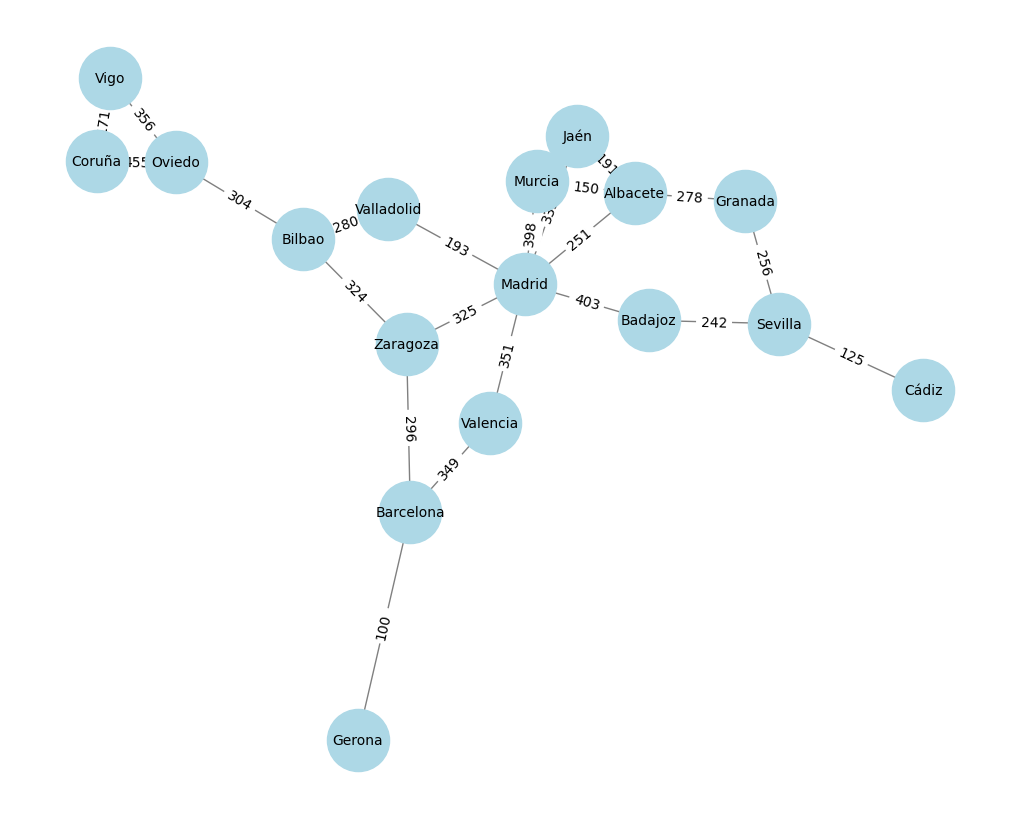

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the cities (vertices) and distances (edges)
ciudades = [
    'Coruña', 'Oviedo', 'Bilbao', 'Valladolid', 'Madrid', 'Zaragoza',
    'Gerona', 'Barcelona', 'Valencia', 'Murcia', 'Albacete', 'Granada',
    'Jaén', 'Sevilla', 'Cádiz', 'Badajoz', 'Vigo'
]

conexiones = {
    ('Coruña', 'Vigo'): 171,
    ('Coruña', 'Oviedo'): 455,
    ('Vigo', 'Oviedo'): 356,
    ('Oviedo', 'Bilbao'): 304,
    ('Bilbao', 'Valladolid'): 280,
    ('Bilbao', 'Zaragoza'): 324,
    ('Zaragoza', 'Barcelona'): 296,
    ('Barcelona', 'Gerona'): 100,
    ('Valladolid', 'Madrid'): 193,
    ('Madrid', 'Zaragoza'): 325,
    ('Madrid', 'Valencia'): 351,
    ('Madrid', 'Murcia'): 398,
    ('Madrid', 'Albacete'): 251,
    ('Madrid', 'Badajoz'): 403,
    ('Badajoz', 'Sevilla'): 242,
    ('Sevilla', 'Cádiz'): 125,
    ('Sevilla', 'Granada'): 256,
    ('Granada', 'Albacete'): 278,
    ('Albacete', 'Murcia'): 150,
    ('Albacete', 'Jaén'): 191,
    ('Jaén', 'Madrid'): 335,
    ('Valencia', 'Barcelona'): 349
}

# Create Adjacency Matrix
matriz_adyacencia = np.zeros((len(ciudades), len(ciudades)), dtype=int)
for (ciudad1, ciudad2), distancia in conexiones.items():
    i, j = ciudades.index(ciudad1), ciudades.index(ciudad2)
    matriz_adyacencia[i][j] = distancia
    matriz_adyacencia[j][i] = distancia  # Assuming an undirected graph

print("Adjacency Matrix:")
print(matriz_adyacencia)

# Create Incidence Matrix
matriz_incidencia = np.zeros((len(ciudades), len(conexiones)), dtype=int)
for idx, ((ciudad1, ciudad2), distancia) in enumerate(conexiones.items()):
    i, j = ciudades.index(ciudad1), ciudades.index(ciudad2)
    matriz_incidencia[i][idx] = 1
    matriz_incidencia[j][idx] = 1

print("\nIncidence Matrix:")
print(matriz_incidencia)

# Create a graph for finding the shortest path
grafo = nx.Graph()
for (ciudad1, ciudad2), distancia in conexiones.items():
    grafo.add_edge(ciudad1, ciudad2, weight=distancia)

# Find shortest path from Madrid to Cádiz
ruta_mas_corta = nx.shortest_path(grafo, source='Madrid', target='Cádiz', weight='weight')
distancia_mas_corta = nx.shortest_path_length(grafo, source='Madrid', target='Cádiz', weight='weight')
print("\nShortest path from Madrid to Cádiz:", ruta_mas_corta)
print("Shortest distance from Madrid to Cádiz:", distancia_mas_corta)

# Plot the graph
plt.figure(figsize=(10, 8))
posicion = nx.spring_layout(grafo)
nx.draw(grafo, posicion, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
nx.draw_networkx_edge_labels(grafo, posicion, edge_labels={(u, v): d for (u, v, d) in grafo.edges(data='weight')})
plt.show()